In [1]:
%run 1_Function_Master.ipynb
%run 2_Parameterization.ipynb

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Coupled model parameterized to recreate Thamatrakoln results

In [2]:
#Parameterization
alpha = (1 / 1.42e8) * 2.1e-10 * 1e6 # host conversion, mmol ml / NT m^3
beta  = (1 / 4e5) * 1.27e-15 * 1e6   # viral conversion, mmol ml / NT m^3

Nn_0 = 1e20
Nr_0 = 1e20
Pu_0 = 1.5e14 * alpha 
Pi_0 = 1e5    * alpha 
Z_0  = 0.
Vi_0 = 1e8    * beta 
Ve_0 = 2.7e12 * beta

z0 = [Nn_0, Nr_0, Pu_0, Pi_0, Z_0, Vi_0, Ve_0]

V_max     = .85             # Maximum phytoplankton growth rate, Fig. 3 (a), irradience 300
γ_Z       = 0               # Growth rate / Assimilation frequency 
φ         = 3.5e-10 / beta  # Converted viral adsorption rate
g         = 0               # Maximum specific grazing rate

V_ind     = 4e5      #NT per individual virus, Table S1
S_ind     = 1.42e8   #NT per individual host, Table S1
ν_x       = V_ind / (V_ind + S_ind) # Proportion of nutrients originating 
                                    # from virus in host-virus pair

λ_P       = 0   # Mortality & Respiration rate
λ_Z       = 0   # Linear mortality & respiration & egestion
λ_Z_hat   = 0   # Quadratic mortality & respiration & egestion
λ_E       = 0   # Mortality 
δ         = .45 # Host lysis rate


μ_V       = 3   # Max host NT recycling rate 
μ_V_prime = 1.6 # Max de novo NT synthesis rate
μ_u       = 0
μ_r       = 0
μ_s       = 1
μ_P       = 0   # Remineralization fraction due to mortality
μ_delta   = 0   # Remineralization fraction due to lysis
μ_g       = 0   # Remineralization fraction due to sloppy-eating
μ_Z       = 0   # Remineralization fraction due to mortality

K_N       = 1          # Half-saturation constant for nutrient limitation
K_I       = 1          # Half-saturation for light limitation
K_h       = 1          # Half-saturation for ... ?
K_P       = 1          # Half-saturation constant for grazing of P
I_0       = (np.e - 1) # Compensation irradiance

ω         = 0 # Entraintment term

param = (V_max, γ_Z, φ, g, ν_x, λ_P, λ_Z, λ_Z_hat, λ_E, δ, μ_V, μ_V_prime, 
          μ_u, μ_r, μ_s, μ_P, μ_delta, μ_g, μ_Z, K_N, K_I, K_h, K_P, I_0, ω)

In [10]:
# Printing initial conditions
names = ['Nn_0', 'Nr_0', 'Pu_0', 'Pi_0', 'Z_0', 'Vi_0', 'Ve_0']

for i, state in enumerate(names):
    print(f'{state} = {z0[i]:4},', end=' ')
print(end='\n \n')

# Printing parameterization
print_parameterization(param)

Nn_0 = 1e+20, Nr_0 = 1e+20, Pu_0 = 221.83098591549293, Pi_0 = 1.4788732394366198e-07, Z_0 =  0.0, Vi_0 = 3.1750000000000003e-07, Ve_0 = 0.0085725, 
 
╒════════════════════════════════════════╤═════════════╤═════════════════╤═════════════╤══════════════════════╕
│ V_max = 0.85                           │ λ_P = 0     │ μ_V = 3         │ μ_P = 0     │ K_I = 1              │
├────────────────────────────────────────┼─────────────┼─────────────────┼─────────────┼──────────────────────┤
│ γ_Z = 0                                │ λ_Z = 0     │ μ_V_prime = 1.6 │ μ_delta = 0 │ K_h = 1              │
├────────────────────────────────────────┼─────────────┼─────────────────┼─────────────┼──────────────────────┤
│ φ = 110236.2205                        │ λ_Z_hat = 0 │ μ_u = 0         │ μ_g = 0     │ K_P = 1              │
├────────────────────────────────────────┼─────────────┼─────────────────┼─────────────┼──────────────────────┤
│ g = 0                                  │ λ_E = 0     │ μ_r = 0  

In [21]:
#Define time span, solve for solution

t = 7 # days
sol = solve_ivp(model, [0, t], z0, args=param, max_step=.01, method="Radau")

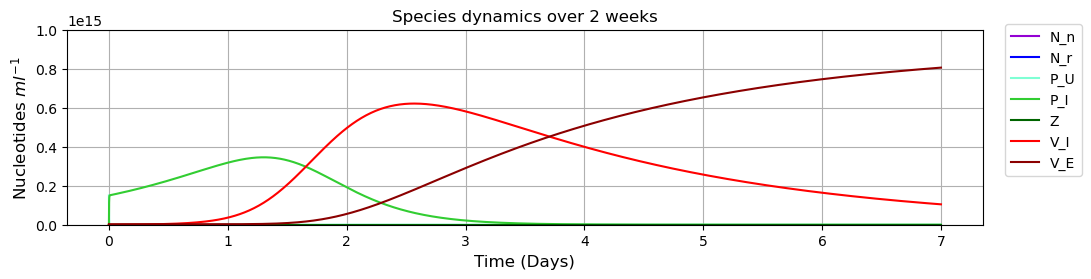

In [26]:
#Plot results
N_n = sol.y[0]
N_r = sol.y[1] 
P_U = sol.y[2] 
P_I = sol.y[3] 
Z   = sol.y[4] 
V_I = sol.y[5] 
V_E = sol.y[6] 
    
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(211)

ax.plot(sol.t, N_n, color="darkviolet", label = "N_n")
ax.plot(sol.t, N_r, color="blue"      , label = "N_r")
ax.plot(sol.t, P_U / alpha, color="aquamarine", label = "P_U")
ax.plot(sol.t, P_I / alpha, color="limegreen" , label = "P_I")
ax.plot(sol.t, Z,  color="darkgreen" , label = "Z ")
ax.plot(sol.t, V_I / beta, color="red"       , label = "V_I")
ax.plot(sol.t, V_E / beta, color="darkred"   , label = "V_E")
        
ax.set_xlabel('Time (Days)', fontsize = 12)
ax.set_ylabel(r'Nucleotides $ml^{-1}$', fontsize = 12)
ax.set_title('Species dynamics over 2 weeks', fontsize = 12)

ax.set_ylim(-.01, 1e15)
ax.legend(loc=(1.025, .25))
ax.grid()

fig.tight_layout()
plt.show()

## Coupled model parameterized to recreate Sarmiento and Gruber N-P-Z

In [27]:
# Parameterization
Nn_0 = 0.0 
Nr_0 = 5.0
Pu_0 = 0.6 
Pi_0 = 0.0
Z_0  = 0.6 
Vi_0 = 0.0
Ve_0 = 0.0

z0 = [Nn_0, Nr_0, Pu_0, Pi_0, Z_0, Vi_0, Ve_0]

V_max     = 1.4 # Maximum phytoplankton growth rate, Fig. 3 (a), irradience 300
γ_Z       = .4  # Growth rate / Assimilation frequency 
φ         = 0   # Viral adsorption rate, ml / (NT * day), Table S1
g         = 1.4 # d^-1 Maximum specific grazing rate

#Irrelevant but included for consistancy
V_ind     = 4e5      # NT per individual virus, Table S1
S_ind     = 1.42e8   # NT per individual host, Table S1

ν_x       = V_ind / (V_ind + S_ind) # Proportion of nutrients originating 
                                    # from virus in host-virus pair

λ_P       = .05 # Mortality & Respiration rate
λ_Z       = .05 # d^-1, Linear mortality & respiration & egestion
λ_Z_hat   = 0   # Quadratic mortality & respiration & egestion
λ_E       = 0   # Extracellular virus mortality 
δ         = 0   # Host lysis rate

μ_V       = 0   # Max host NT recycling rate 
μ_V_prime = 0   # Max de novo NT synthesis rate
μ_u       = 0
μ_r       = 0
μ_s       = 1
μ_P       = .4   # Remineralization fraction due to mortality
μ_delta   = 0   # Remineralization fraction due to lysis
μ_g       = .4   # Remineralization fraction due to sloppy-eating
μ_Z       = .4   # Remineralization fraction due to mortality

K_N       = .1  # mmol m^-3 # Half-saturation constant for nutrient limitation
K_I       = 1   # Half-saturation for light limitation
K_h       = 1   # Half-saturation for ... ?
K_P       = 2.8 # mmol m^-3, Half-saturation constant for grazing of P
I_0       = (np.e - 1) # Compensation irradiance

ω         = 0 # Entraintment term

param = (V_max, γ_Z, φ, g, ν_x, λ_P, λ_Z, λ_Z_hat, λ_E, δ, μ_V, μ_V_prime, 
          μ_u, μ_r, μ_s, μ_P, μ_delta, μ_g, μ_Z, K_N, K_I, K_h, K_P, I_0, ω)

In [30]:
# Printing initial conditions
names = ['Nn_0', 'Nr_0', 'Pu_0', 'Pi_0', 'Z_0', 'Vi_0', 'Ve_0']

for i, state in enumerate(names):
    print(f'{state} = {z0[i]},', end='  ')
print(end='\n \n')

# Print parameterization
print_parameterization(param)

Nn_0 = 0.0,  Nr_0 = 5.0,  Pu_0 = 0.6,  Pi_0 = 0.0,  Z_0 = 0.6,  Vi_0 = 0.0,  Ve_0 = 0.0,  
 
╒════════════════════════════════════════╤═════════════╤═══════════════╤═════════════╤══════════════════════╕
│ V_max = 1.4                            │ λ_P = 0.05  │ μ_V = 0       │ μ_P = 0.4   │ K_I = 1              │
├────────────────────────────────────────┼─────────────┼───────────────┼─────────────┼──────────────────────┤
│ γ_Z = 0.4                              │ λ_Z = 0.05  │ μ_V_prime = 0 │ μ_delta = 0 │ K_h = 1              │
├────────────────────────────────────────┼─────────────┼───────────────┼─────────────┼──────────────────────┤
│ φ = 0                                  │ λ_Z_hat = 0 │ μ_u = 0       │ μ_g = 0.4   │ K_P = 2.8            │
├────────────────────────────────────────┼─────────────┼───────────────┼─────────────┼──────────────────────┤
│ g = 1.4                                │ λ_E = 0     │ μ_r = 0       │ μ_Z = 0.4   │ I_0 = e - 1 = 1.7183 │
├──────────────────────────

In [31]:
sol = solve_ivp(model, [0, 30], z0, args=param, max_step=.1, method="LSODA")

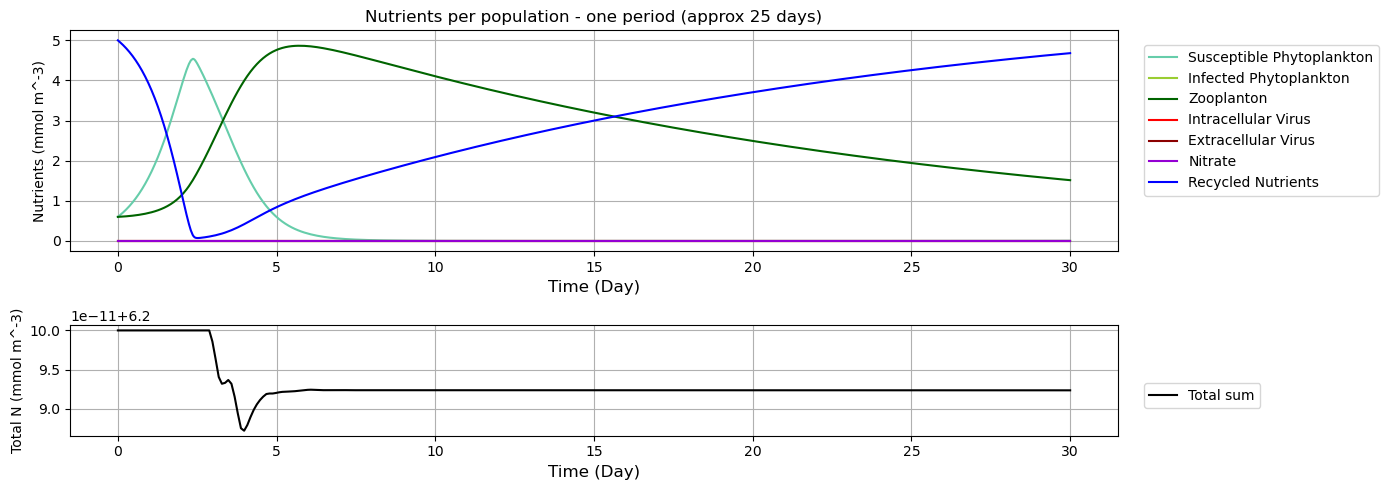

In [32]:
# Plot results
N_n = sol.y[0]
N_r = sol.y[1] 
P_U = sol.y[2] 
P_I = sol.y[3] 
Z   = sol.y[4]
V_I = sol.y[5]        
V_E = sol.y[6] 

fig, (ax, ax2) = plt.subplots(2, 1, height_ratios=[2, 1], figsize=(14, 5))

#One cycle
ax.plot(sol.t, P_U, color="mediumaquamarine", label='Susceptible Phytoplankton')
ax.plot(sol.t, P_I, color="yellowgreen"     , label='Infected Phytoplankton')
ax.plot(sol.t, Z,   color="darkgreen"       , label='Zooplanton')
ax.plot(sol.t, V_I, color="red"             , label='Intracellular Virus')
ax.plot(sol.t, V_E, color="darkred"         , label='Extracellular Virus')
ax.plot(sol.t, N_n, color="darkviolet"      , label='Nitrate')
ax.plot(sol.t, N_r, color="blue"            , label='Recycled Nutrients')

ax.set_xlabel('Time (Day)', fontsize = 12)
ax.set_ylabel('Nutrients (mmol m^-3)')
ax.set_title('Nutrients per population - one period (approx 25 days)',fontsize = 12)
ax.legend(loc=(1.025, .25))
ax.grid()

total_N =  N_n + N_r + P_U + P_I + Z + V_I + V_E
ax2.plot(sol.t, total_N, color='black', label='Total sum')
ax2.set_xlabel('Time (Day)', fontsize = 12)
ax2.set_ylabel('Total N (mmol m^-3)')
ax2.legend(loc=(1.025, .25))
ax2.grid()

fig.tight_layout()
plt.show()

The total nutrient level of the system is fluctuating on the order of 1e-11, which is seemingly due to numerical error as the equations are formulated to be closed. 